Exploratory Data Analysis (EDA) on Telecommunications Data

In [1]:
# from sklearn.cluster import KMeans
# import seaborn as sns
# import matplotlib.pyplot as plt
import pandas as pd
import os
# import sys
os.chdir('..')
import sqlalchemy

Data Extraction

In [ ]:

from scripts.dbconnection import test_connection
test_connection

<function scripts.dbconnection.test_connection()>

Extract telecommunications data from the XDR_data table

In [3]:
# xdr_data = get_dataFrame_from_database()
from scripts.dbconnection import get_engine
engine = get_engine()


In [4]:
from sqlalchemy import create_engine

In [5]:
query = "SELECT * FROM xdr_data LIMIT 10;"
xdr_data = pd.read_sql(query, con=engine)
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
xdr_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.000000e+01,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,5.000000,5.000000,10.000000,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.310007e+19,382.100000,552.200000,1.182834e+06,2.082012e+14,3.370126e+10,4.571034e+13,69.000000,8.000000,777.600000,...,1.680073e+07,1.120888e+07,1.254776e+07,8.059474e+06,5.580685e+08,8.183213e+06,4.643101e+08,1.051576e+07,4.021279e+07,5.969786e+08
std,3.038214e+16,274.046407,282.670912,2.887791e+05,5.179483e+08,4.171101e+07,2.158009e+13,29.656365,5.656854,1578.427642,...,4.483981e+06,7.312337e+06,4.278408e+06,6.362678e+06,2.798358e+08,6.198674e+06,2.543565e+08,4.054545e+06,1.147913e+07,2.823807e+08
min,1.304243e+19,0.000000,168.000000,8.644820e+05,2.082003e+14,3.365922e+10,3.528151e+13,39.000000,5.000000,6.000000,...,7.234465e+06,1.886295e+06,6.858496e+06,4.152180e+05,4.479622e+07,3.956300e+05,6.485604e+07,4.215763e+06,2.241798e+07,7.056205e+07
25%,1.311448e+19,149.500000,341.000000,9.722842e+05,2.082011e+14,3.366607e+10,3.536921e+13,42.000000,5.000000,17.500000,...,1.540819e+07,3.601633e+06,8.796018e+06,2.364308e+06,3.404885e+08,2.075878e+06,2.323635e+08,7.989591e+06,3.191825e+07,3.739444e+08
50%,1.311448e+19,462.500000,579.500000,1.081824e+06,2.082014e+14,3.369030e+10,3.554181e+13,65.000000,5.000000,33.500000,...,1.738749e+07,1.278022e+07,1.272108e+07,7.501812e+06,6.595218e+08,8.699036e+06,5.322530e+08,1.172353e+07,4.045298e+07,7.039186e+08
75%,1.311448e+19,585.250000,659.500000,1.351699e+06,2.082014e+14,3.373771e+10,3.573878e+13,97.000000,7.000000,64.000000,...,2.011696e+07,1.800882e+07,1.634210e+07,1.147047e+07,7.868802e+08,1.385569e+07,6.289111e+08,1.363654e+07,4.677499e+07,8.283590e+08
max,1.311448e+19,770.000000,960.000000,1.823652e+06,2.082019e+14,3.376349e+10,8.676270e+13,102.000000,18.000000,3845.000000,...,2.138812e+07,1.973518e+07,1.833841e+07,1.798176e+07,8.216713e+08,1.614962e+07,8.036536e+08,1.505514e+07,5.881302e+07,8.616123e+08


Check datatype of extracted dataset

In [7]:
dataType_of_Dataset=xdr_data.dtypes
dataType_of_Dataset.head(dataType_of_Dataset.size)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Number of rows and columns

In [8]:
print("Rows=", xdr_data.shape[0], "Columns=", xdr_data.shape[1])

Rows= 10 Columns= 55


Find any missing values

In [9]:
from scripts.data_cleaning import find_missing_values
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)

From 55 columns selected, there are 12 columns with missing values.


,Missing values,Percent of Total Values,DataType
Nb of sec with 37500B < Vol UL,10,100.0,object
Nb of sec with 125000B < Vol DL,10,100.0,object
TCP UL Retrans. Vol (Bytes),9,90.0,float64
Nb of sec with 6250B < Vol UL < 37500B,9,90.0,float64
Nb of sec with 1250B < Vol UL < 6250B,8,80.0,float64
HTTP UL (Bytes),8,80.0,float64
TCP DL Retrans. Vol (Bytes),8,80.0,float64
HTTP DL (Bytes),8,80.0,float64
Nb of sec with 31250B < Vol DL < 125000B,8,80.0,float64
Nb of sec with 6250B < Vol DL < 31250B,8,80.0,float64


Replace missing value with appropriate method

In [ ]:
from scripts.data_cleaning import replace_missing_values
xdr_data=replace_missing_values(xdr_data)

d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\data_cleaning.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[column].fillna(column_mean, inplace=True)
d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\data_cleaning.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Check replaced missing values

In [11]:
find_missing_values(xdr_data)

From 55 columns selected, there are 2 columns with missing values.


,Missing values,Percent of Total Values,DataType
Nb of sec with 125000B < Vol DL,10,100.0,object
Nb of sec with 37500B < Vol UL,10,100.0,object


DataSet after replaced missing value

In [12]:
xdr_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [13]:
xdr_data['Dur. (ms).1']

0    1.823653e+09
1    1.365104e+09
2    1.361763e+09
3    1.321510e+09
4    1.089009e+09
5    1.074638e+09
6    1.035262e+09
7    9.512929e+08
8    9.416348e+08
9    8.644823e+08
Name: Dur. (ms).1, dtype: float64

In [14]:
xdr_data['Dur. (ms)']

0    1823652.0
1    1365104.0
2    1361762.0
3    1321509.0
4    1089009.0
5    1074638.0
6    1035261.0
7     951292.0
8     941634.0
9     864482.0
Name: Dur. (ms), dtype: float64

Convert Byte into MB

In [15]:
from scripts.data_transform import convertByteIntoMegaByte
xdr_data=convertByteIntoMegaByte(xdr_data)

In [16]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+08,33664.962239,3.552121e+07,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+08,33681.854413,3.579401e+07,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+08,33760.627129,3.528151e+07,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+08,33750.343200,3.535661e+07,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+08,33699.795932,3.540701e+07,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


Find  Outliers

In [17]:
from scripts.data_cleaning import get_outlier_summary
outlier_summary=get_outlier_summary(xdr_data)
outlier_summary.head(outlier_summary.size)

From 48 selected numerical columns, there are 23 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,2
1,Start ms,0
2,End ms,0
3,Dur. (ms),0
4,IMSI,2
5,MSISDN/Number,0
6,IMEI,2
7,Avg RTT DL (ms),4
8,Avg RTT UL (ms),1
9,Avg Bearer TP DL (kbps),2


Box Plot before remove outlier

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


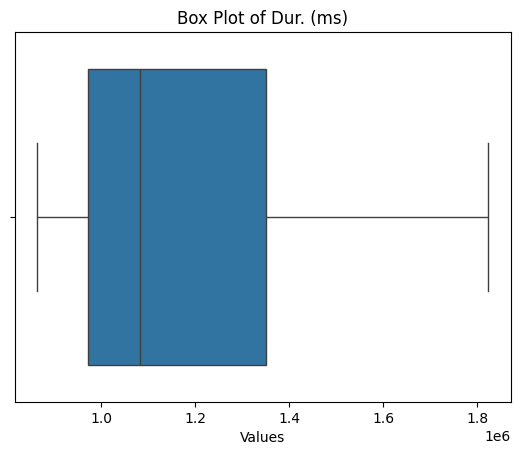

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


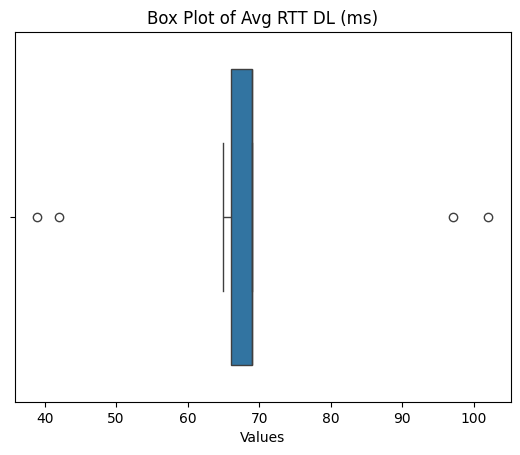

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


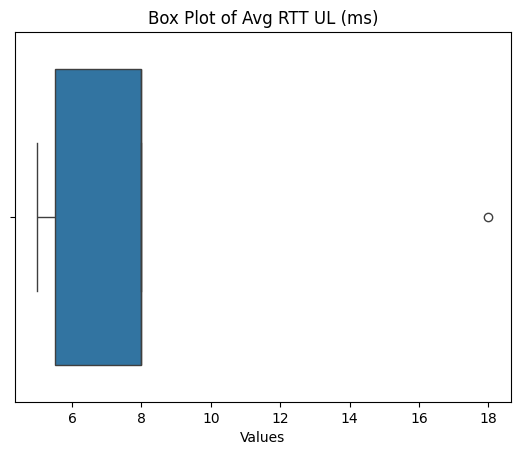

Skipping non-numeric column: Nb of sec with 37500B < Vol UL


d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


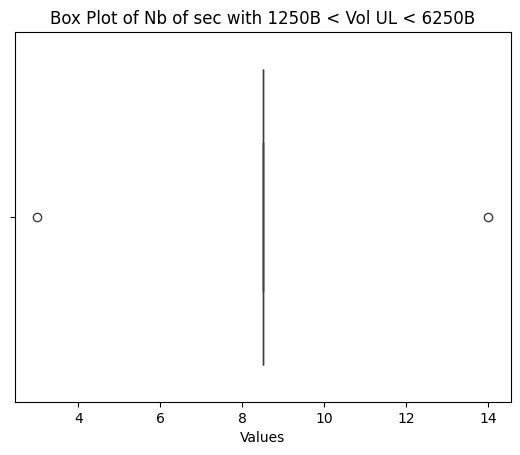

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


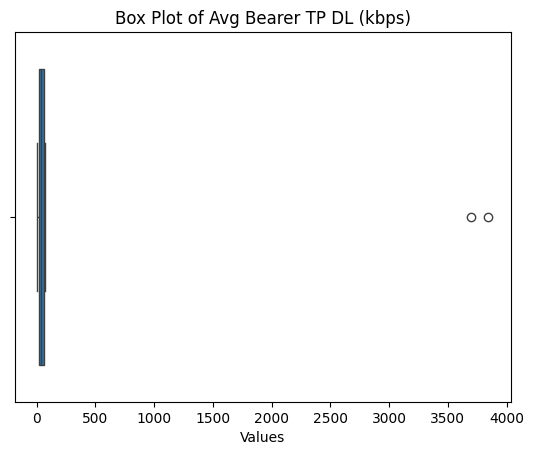

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


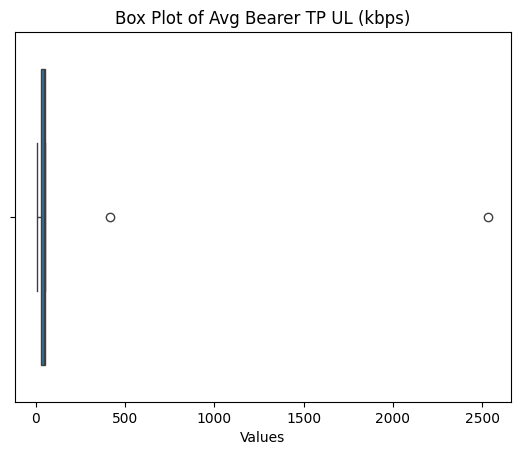

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


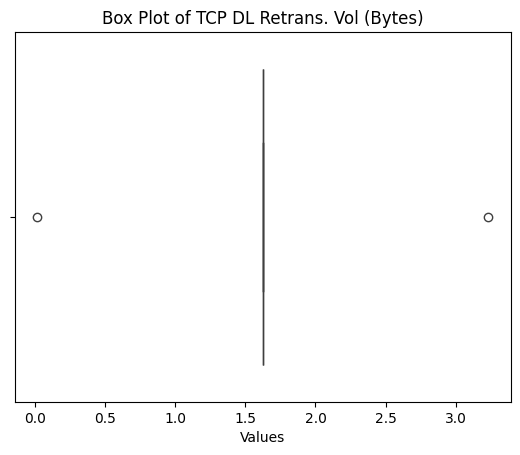

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


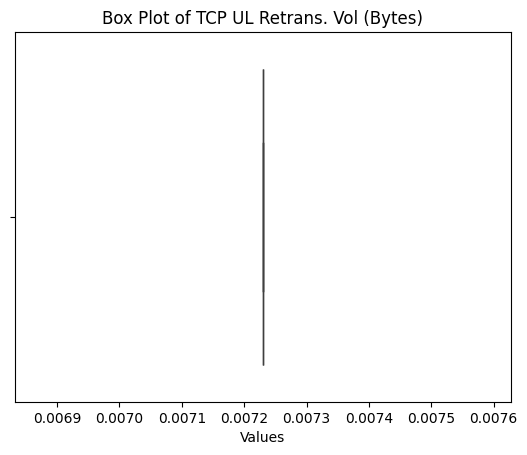

In [18]:
from scripts.data_cleaning import getBoxPlotToCheckOutlier
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 37500B < Vol UL','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])


Remove outliers

In [19]:
from scripts.data_cleaning import remove_outliers_winsorization
# Remove outliers using winsorization
xdr_data=remove_outliers_winsorization(xdr_data)


In [20]:
get_outlier_summary(xdr_data)

From 48 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),0
4,IMSI,0
5,MSISDN/Number,0
6,IMEI,0
7,Avg RTT DL (ms),0
8,Avg RTT UL (ms),0
9,Avg Bearer TP DL (kbps),0


Box Plot After remove Outlier

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


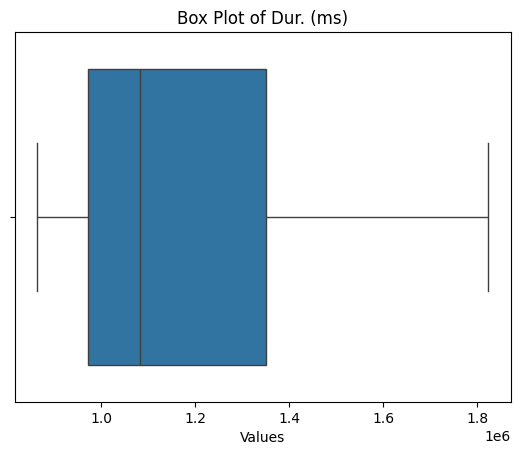

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


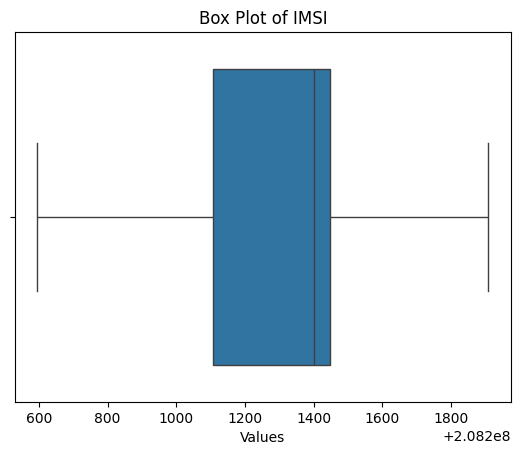

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


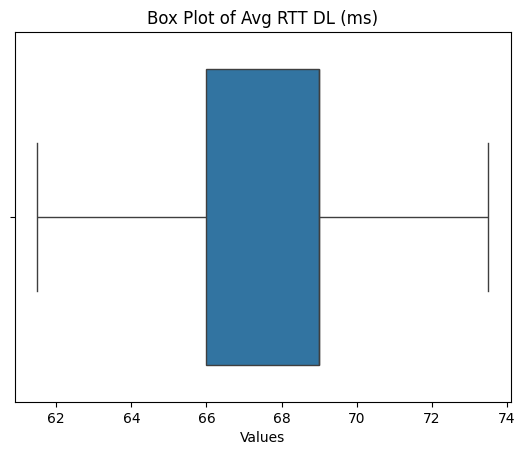

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


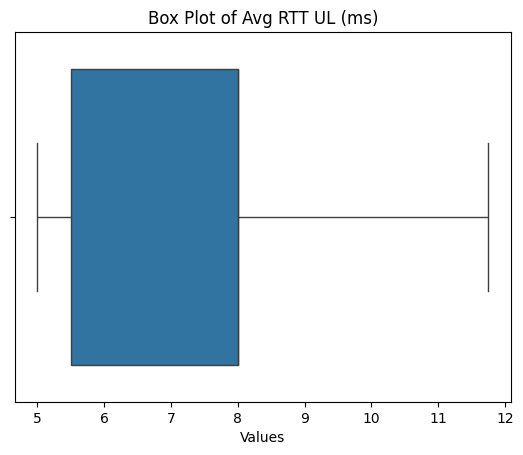

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


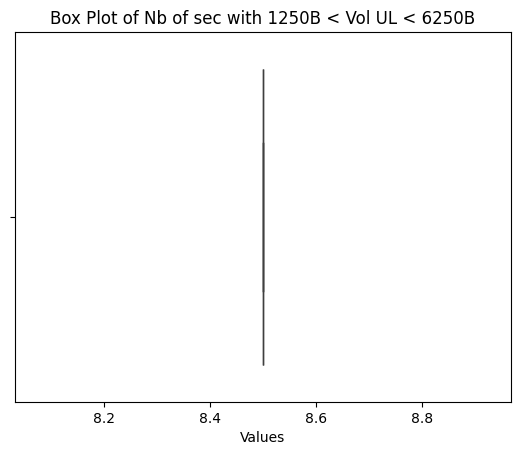

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


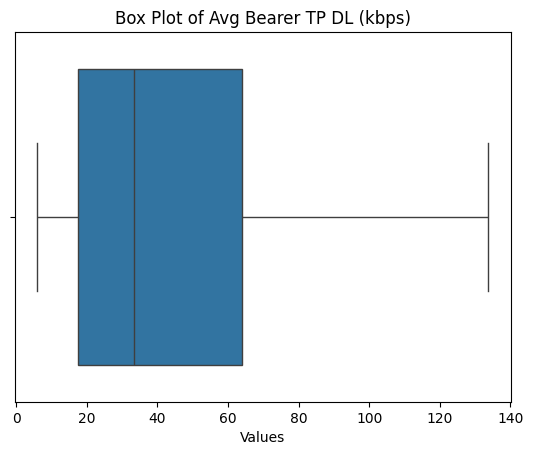

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


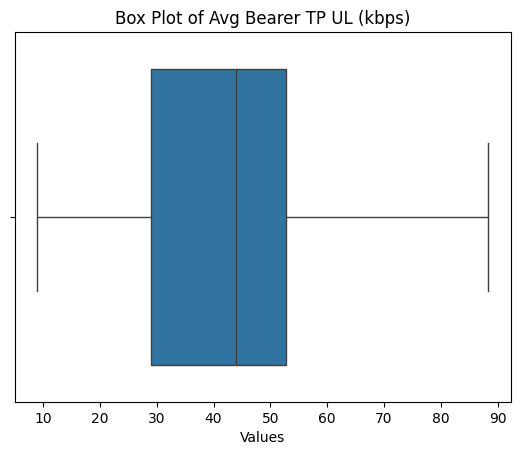

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


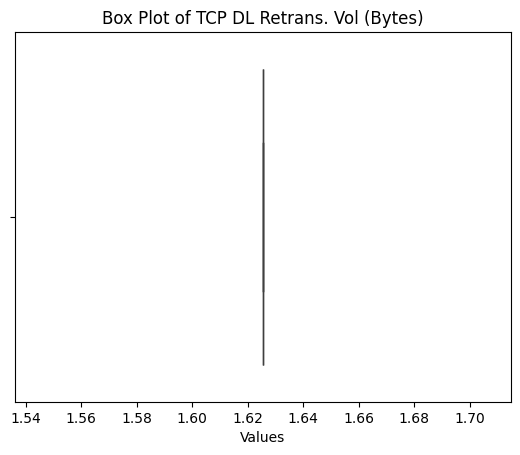

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


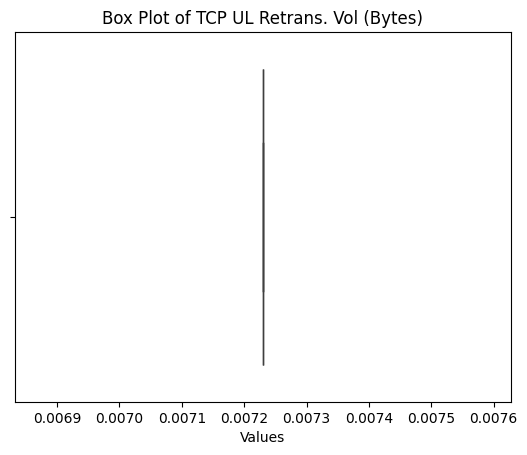

In [21]:
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','IMSI','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])
